# Regresión Lineal

## 1. Introducción.

La regresión linear es un método que intenta encontrar la relación entre una variable respuesta y una o más variables explicativas de tal modo que la variable respuesta pueda ser considerada dependiente de la otra(s). Este proceso está presente en múltiples aplicaciones tanto en la ingeniería, la física, como en las ciencias sociales o inclusive en la medicina a pesar de su increíble simplicidad. Existen dos clases la regresión lineal, la regresión lineal simple y la regresión lineal múltiple, en la regresión lineal simple existe una única variable explicativa para la variable respuesta y cuyo algoritmo sera explicado y ejemplificado en el presente notebook. Este proceso intenta encontrar los coeficientes adecuados de una recta en el plano cartesiano para minimizar la suma de los cuadrados de la distancia de los datos para a una línea recta. Los componentes más importantes de la regresión lineal simple son ejemplificados en la siguiente imagen.



<center><img style="transform: rotate(); width:500px" src="https://vitalflux.com/wp-content/uploads/2020/09/Regression-terminologies.png" alt="sieve shaker" title="Regresión lineal simple"/></center>

## 2. Breve Historia

La regresión lineal es una de las técnicas estadísticas de análisis entre variables más usadas en todo en mundo. El objetivo principal de este análisis es establecer una relación de dependencia entre una variable respuesta y una o múltiples variables explicativas.


La primera vez que se estudio a profundidad este método fue en el siglo 19 de la mano del científico británico Sir Francis Galton, quien ya era famosos por sus exploraciones y sus libros de como sobrevivir en lugares salvajes.


Galton fue un pionero en varias ramas de las ciencias entre ellas la estadística, como autodidacta de la naturaleza y mientras estudiaba los datos de los tamaños de padres y la descendencia de varios tipos de animales y plantas el observo que **"Un padre más grande que la media tiende a producir un hijo más grande que la media, pero es probable que el hijo sea menos grande que el padre en términos de su posición relativa dentro de su propia generación"**[[Cita]](http://people.duke.edu/~rnau/regintro.htm "Introduction to linear regression analysis").


La siguiente ilustración de los estudios realizados por Galton, para este caso R es la pendiente de la recta y lo el coeficiente de relación.

![Galton](./Img/Galton.jpg) 

**Imagen de la primera regresion lineal por Galton en 1877** 
 

## 3. El planteamiento del algortimo.

El algoritmo del modelo de regresión lineal simple como se mencionó anteriormente solo tiene una explicativa o covariable en relación a una variable respuesta, estando su modelo general definido por:


$$ y = B_{0}+ B_{1}x + error $$


Donde $B_{0}$ es la ordenada al orgien, $B_{1}$ es la pendiente que acompaña a $x$, estos son los llamados **coeficientes de regresión** además se cuenta con un error de promedio cero, varianza desconocida y no relacionados entre si.

Para estimar los valores de $B_{0}$ y $B_{1}$ se usa el metodo de minimos cuadrados, es decir que la distancia entre las observaciones sea minima. es decir que:

$S\left(B_{0},B_{1}\right)=\sum _{i=1}^n\:\left(y_i-B_{0}-B_{1}x_{i}\right)^2$

Donde:

$$\bar{y}=\frac{1}{n}\sum _{i=1}^n\:\left(y_i\right)$$ 

con 

$$\bar{x}=\frac{1}{n}\sum _{i=1}^n\:\left(x_i\right)$$


Para los estimadores, por minimos cuadrados, de $B_{0}$ y $B_{1}$, se designan como $\hat{B}_{0}$ y $\hat{B}_{1}$:

$$\hat{B}_1=\frac{\sum_{i=1}^n\left(y_ix_i\right)-\frac{\sum _{i=1}^n\left(y_i\right)\cdot\sum_{i=1}^n\:\left(x_i\right)}{n}}{\sum_{i=1}^nx^2-\frac{\left(\sum_{i=1}^n\left(x_i\right)\right)^2}{n}}$$

En otras palabras:

$$\hat{B_1}\:=\:\frac{S_{xy}}{S_{xx}}\:=\:\frac{\sum _{i=1}^n\:\left(x_i-\bar{x}\right)^2\:\:}{\sum \:_{i=1}^n\:y_i\left(x_i-\bar{x}\right)\:}$$

Ahora que tenemos a $\hat{B}_1$, calcularemos a $\hat{B}_0$

$$\hat{B}_0=\bar{y}-\hat{B}_1\bar{x}$$

El error entre el valor observado y el valor ajustado se encuentra dado por:

$$e_i=y_i-\hat{y_i},\:i\:=\:1,2,...,n$$


## 4. Desarrollo de un ejemplo de regresión lineal, con datos reales.

Los siguientes datos corresponden a los 50 estados y al Distrito de Columbia de Estados Unidos .  La variables respuesta  y es la tasa de natalidad del año 2002 por cada 1000 mujeres de 15 a 17 años y la covariable x  es tasa de pobreza, que es el porcentaje de la población que vive en hogares con ingresos inferiores al nivel de pobreza definido por el gobierno federal. (Fuente de datos: Mind On Statistics, 3ª edición, Utts y Heckard).

### 4.1 Exploración de los datos

In [1]:
# Importación de librerias necesarias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Lectura de datos
poverty = pd.read_csv("./Datasets/poverty.csv", sep=";")

# Exploración de los datos
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


Por facilidad asigaremos la tasa de pobreza a la variable $x$ y la tasa de natalidad a la varaible $y$

Text(0, 0.5, 'Tasa de natalidad mujeres de 15 a 17')

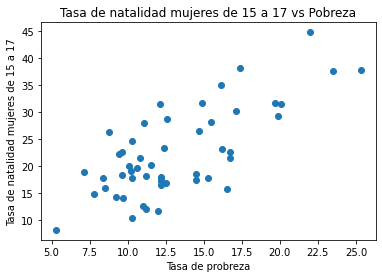

In [3]:
## Asignación de los datos a las variables
x = np.array(poverty['PovPct']).reshape(-1, 1)
y = np.array(poverty['Brth15to17']).reshape(-1, 1)

# Visualización de los datos
plt.scatter(x,y)
plt.title("Tasa de natalidad mujeres de 15 a 17 vs Pobreza" )
plt.xlabel("Tasa de probreza")
plt.ylabel("Tasa de natalidad mujeres de 15 a 17")


### 4.2 Calculo del promedio de la porbreza y la natalidad


Recordando que:

$$\bar{y}=\frac{1}{n}\sum \:_{i=1}^n\:\left(y_i\right)\:;\:\:\:\:\:\bar{x}=\frac{1}{n}\sum \:_{i=1}^n\:\left(x_i\right)$$


In [4]:
# Calculo de los promedios
x_mean = x.mean()
y_mean = y.mean()

print("Promedio tasa de pobreza: " + str(x_mean))
print("Promedio tasa de natalidad: " + str(y_mean))

Promedio tasa de pobreza: 13.117647058823534
Promedio tasa de natalidad: 22.282352941176473


### 4.2 Calculo del estimador $\hat{B_{1}}$


En otras palabras:

$$\hat{B_1}\:=\:\frac{S_{xy}}{S_{xx}}\:=\:\frac{\sum _{i=1}^n\:\left(x_i-\bar{x}\right)^2\:\:}{\sum \:_{i=1}^n\:y_i\left(x_i-\bar{x}\right)\:}$$



In [5]:
# Calculo de del coeficiente B1

Sxy = 0
Sxx = 0

for val in x:
    
    Sxx += (val-x_mean)**2
    
for i,val in enumerate(x):
    
    Sxy += y[i]*(val-x_mean)

B1 = Sxy/Sxx

print("B1: " + str(B1))


B1: [1.37334539]


### 4.3 Calculo del estimador $\hat{B_{0}}$



$$\hat{B}_0=\bar{y}-\hat{B}_1\bar{x}$$


In [6]:
B0 = y_mean - B1*x_mean
print("B0: " + str(B0))

B0: [4.26729284]


## 5. Conclusiones

Podemos decir entonces que el modelo:

$$Tasa\:natalidad\:15a17=\:4.26\:+1.37\cdot tasa\:de\:pobreza$$

Al ajustar la recta a los datos podemos ver que la tasa de natalidad aumenta con una relación lineal dependiente positiva, a medida que aumenta el nivel de pobreza aumenta la tasa de natilidad entre las jovenes de 15 a 17 años de los 50 estados y el distrito de columbia.

Text(0, 0.5, 'Datos en y')

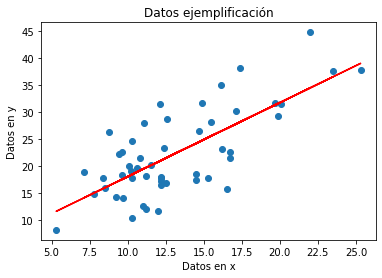

In [7]:
plt.scatter(x,y)
line = B0 + B1*x
plt.plot(x, line, color='r')
plt.title("Datos ejemplificación")
plt.xlabel("Datos en x")
plt.ylabel("Datos en y")

Gracias al modelo se puede decir que la tasa de natalidad de mujeres entre 15 a 17 años aumenta 1,373 unidades, por cada aumento de una unidad (uno por ciento) en la tasa de pobreza. 


Si hubiera un estado que no tuviera pobreza la media prevista para la tasa de natalidad de 15 a 17 años sería de 4,267.

### 5.1 Calculo del R cuadrado

$$R^2=\frac{SSR}{SST}=\frac{\sum _{i=1}^n\left(\hat{y}-\bar{y}\right)^2\:}{\sum \:_{i=1}^n\left(y-\bar{y}\right)^2\:}$$

In [8]:

SSR = 0
SST = 0

for val in line:

    SSR += (val-y_mean)**2

for val in y:

    SST += (val-y_mean)**2
    
R_2 = SSR/SST

print("El R cuadrado es:" + str(R_2))

El R cuadrado es:[0.53332796]


El valor de r2 puede interpretarse como que las tasas de pobreza "explican" el 53,3% de la variación observada en las tasas medias de natalidad de 15 a 17 años de los estados.